In [1]:
from pydub.utils import mediainfo
import os, glob
from compress_audio import Normalize_Audio
from ffmpy import FFmpeg
import time
import ntpath
from add_background_noise import Background_noise
import matplotlib.pyplot as plt
import librosa
from librosa import display as ld

### Importing data

In [2]:
os.chdir("data")
DATA_DIR = os.getcwd()
FOLDERNAMES = []
background_audio_folder=[]
for foldername in glob.glob(os.path.join(DATA_DIR, '*')):
    if "background_noise" in foldername:
        background_audio_folder.append(foldername)
    else:
        FOLDERNAMES.append(foldername)
print(FOLDERNAMES)
print(background_audio_folder)

['C:\\Users\\suydu\\Desktop\\Berkeley\\210_Capstone\\data\\afr']
['C:\\Users\\suydu\\Desktop\\Berkeley\\210_Capstone\\data\\background_noise_data']


In [3]:
t0 = time.time()
audio_info = []
counter=0
for folder in FOLDERNAMES:
    for filename in glob.glob(os.path.join(folder, '*.wav')):
        audio_info.append(mediainfo(filename))
t1 = time.time()
print("It took %.2f seconds to gather info for %s records." % (t1-t0, len(audio_info)))
audio_info[0]

It took 421.17 seconds to gather info for 2927 records.


{'index': '0',
 'codec_name': 'pcm_s16le',
 'codec_long_name': 'PCM signed 16-bit little-endian',
 'profile': 'unknown',
 'codec_type': 'audio',
 'codec_time_base': '1/48000',
 'codec_tag_string': '[1][0][0][0]',
 'codec_tag': '0x0001',
 'sample_fmt': 's16',
 'sample_rate': '48000',
 'channels': '1',
 'channel_layout': 'unknown',
 'bits_per_sample': '16',
 'id': 'N/A',
 'r_frame_rate': '0/0',
 'avg_frame_rate': '0/0',
 'time_base': '1/48000',
 'start_pts': 'N/A',
 'start_time': 'N/A',
 'duration_ts': '203552',
 'duration': '4.240667',
 'bit_rate': '768082',
 'max_bit_rate': 'N/A',
 'bits_per_raw_sample': 'N/A',
 'nb_frames': 'N/A',
 'nb_read_frames': 'N/A',
 'nb_read_packets': 'N/A',
 'DISPOSITION': {'default': '0',
  'dub': '0',
  'original': '0',
  'comment': '0',
  'lyrics': '0',
  'karaoke': '0',
  'forced': '0',
  'hearing_impaired': '0',
  'visual_impaired': '0',
  'clean_effects': '0',
  'attached_pic': '0',
  'timed_thumbnails': '0'},
 'filename': 'C:\\Users\\suydu\\Desktop\\Be

### Add random background noise to all audio files

In [4]:
t0 = time.time()
for folder in FOLDERNAMES:
    for filepath in glob.glob(os.path.join(folder, '*.wav')):
        #Adds random noise as background noise to audio
        Background_noise.random_noise(filepath,background_audio_folder[0])
t1 = time.time()
print("It took %.2f seconds to add background noise to audio files" % (t1-t0))

It took 1630.89 seconds to add background noise to audio files


### Normalise Audio to standard bitrate

In [5]:
t0 = time.time()
for folder in FOLDERNAMES:
    for filepath in glob.glob(os.path.join(folder, 'bn_added\\*.wav')):
        #normalise audio files to 320k bit rate
        Normalize_Audio.normalize(filepath,320000)
t1 = time.time()
print("It took %.2f seconds to normalize files" % (t1-t0))

It took 609.08 seconds to normalize files


#### Read Normalized audio files

In [6]:
t0 = time.time()
audio_info = []
for folder in FOLDERNAMES:
    for filename in glob.glob(os.path.join(folder, 'bn_added\\normalized\\*.mp3')):
        audio_info.append(mediainfo(filename))
t1 = time.time()
print("It took %.2f seconds to gather info for %s records." % (t1-t0, len(audio_info)))
audio_info[0]

It took 369.76 seconds to gather info for 2927 records.


{'index': '0',
 'codec_name': 'mp3',
 'codec_long_name': 'MP3 (MPEG audio layer 3)',
 'profile': 'unknown',
 'codec_type': 'audio',
 'codec_time_base': '1/48000',
 'codec_tag_string': '[0][0][0][0]',
 'codec_tag': '0x0000',
 'sample_fmt': 'fltp',
 'sample_rate': '48000',
 'channels': '1',
 'channel_layout': 'mono',
 'bits_per_sample': '0',
 'id': 'N/A',
 'r_frame_rate': '0/0',
 'avg_frame_rate': '0/0',
 'time_base': '1/14112000',
 'start_pts': '324870',
 'start_time': '0.023021',
 'duration_ts': '60286464',
 'duration': '4.272000',
 'bit_rate': '321882',
 'max_bit_rate': 'N/A',
 'bits_per_raw_sample': 'N/A',
 'nb_frames': 'N/A',
 'nb_read_frames': 'N/A',
 'nb_read_packets': 'N/A',
 'DISPOSITION': {'default': '0',
  'dub': '0',
  'original': '0',
  'comment': '0',
  'lyrics': '0',
  'karaoke': '0',
  'forced': '0',
  'hearing_impaired': '0',
  'visual_impaired': '0',
  'clean_effects': '0',
  'attached_pic': '0',
  'timed_thumbnails': '0'},
 'filename': 'C:\\Users\\suydu\\Desktop\\Berke

### Compress Audio to low quality

In [7]:
t0 = time.time()
for folder in FOLDERNAMES:
    for filename in glob.glob(os.path.join(folder, 'bn_added\\normalized\\*.mp3')):
        #normalise audio files to 16k bit rate
        Normalize_Audio.compress(filename,32000)
t1 = time.time()
print("It took %.2f seconds to compress files" % (t1-t0))

It took 433.39 seconds to compress files


#### Read Compressed Audio files 

In [10]:
t0 = time.time()
audio_info = []
for folder in FOLDERNAMES:
    for filename in glob.glob(os.path.join(folder, 'bn_added\\normalized\\compressed\\*.mp3')):
        audio_info.append(mediainfo(filename))
t1 = time.time()
print("It took %.2f seconds to gather info for %s records." % (t1-t0, len(audio_info)))
audio_info[0]

It took 443.77 seconds to gather info for 2927 records.


{'index': '0',
 'codec_name': 'mp3',
 'codec_long_name': 'MP3 (MPEG audio layer 3)',
 'profile': 'unknown',
 'codec_type': 'audio',
 'codec_time_base': '1/48000',
 'codec_tag_string': '[0][0][0][0]',
 'codec_tag': '0x0000',
 'sample_fmt': 'fltp',
 'sample_rate': '48000',
 'channels': '1',
 'channel_layout': 'mono',
 'bits_per_sample': '0',
 'id': 'N/A',
 'r_frame_rate': '0/0',
 'avg_frame_rate': '0/0',
 'time_base': '1/14112000',
 'start_pts': '324870',
 'start_time': '0.023021',
 'duration_ts': '60286464',
 'duration': '4.272000',
 'bit_rate': '32443',
 'max_bit_rate': 'N/A',
 'bits_per_raw_sample': 'N/A',
 'nb_frames': 'N/A',
 'nb_read_frames': 'N/A',
 'nb_read_packets': 'N/A',
 'DISPOSITION': {'default': '0',
  'dub': '0',
  'original': '0',
  'comment': '0',
  'lyrics': '0',
  'karaoke': '0',
  'forced': '0',
  'hearing_impaired': '0',
  'visual_impaired': '0',
  'clean_effects': '0',
  'attached_pic': '0',
  'timed_thumbnails': '0'},
 'filename': 'C:\\Users\\suydu\\Desktop\\Berkel

In [58]:
# !pip install pyqt5
# !pip install librosa --ignore-installed --user --no-warn-script-location

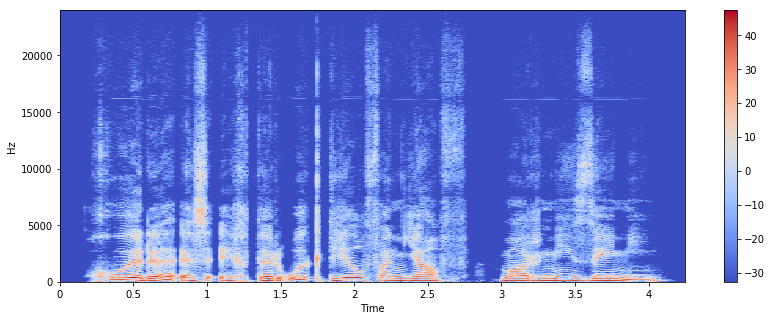

In [2]:
x, sr = librosa.load("afr_0184_0007791035.wav", sr=48000)
X = librosa.stft(x)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
plt.colorbar()

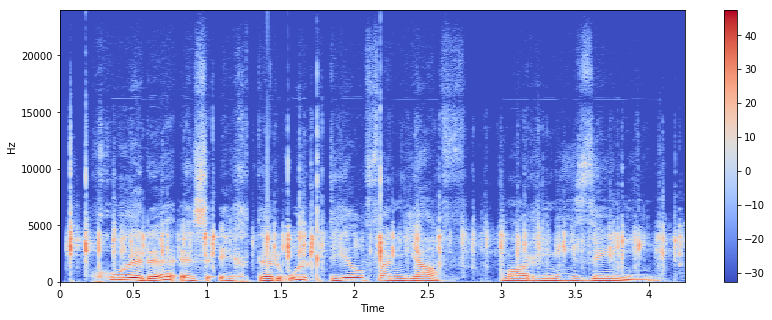

In [3]:
x, sr = librosa.load("afr_0184_0007791035_bn_added.wav", sr=48000)
X = librosa.stft(x)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
plt.colorbar()

C:\Users\suydu\AppData\Roaming\Python\Python37\site-packages\librosa\core\audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


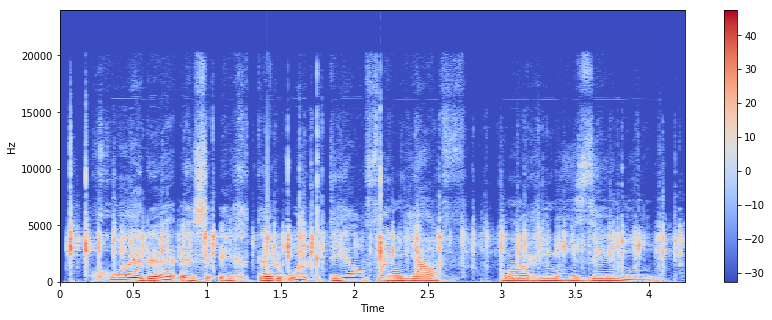

In [4]:
x, sr = librosa.load("afr_0184_0007791035_bn_added_normalized.mp3", sr=48000)
X = librosa.stft(x)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
plt.colorbar()

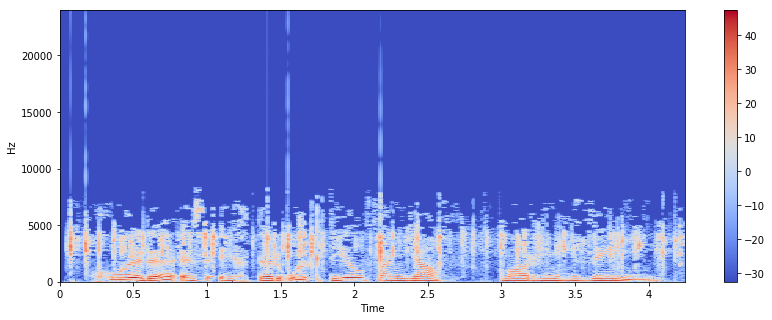

In [5]:
x, sr = librosa.load("afr_0184_0007791035_bn_added_normalized_compressed.mp3", sr=48000)
X = librosa.stft(x)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
plt.colorbar()